In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load data and filter for appropriate columns
wifi_data = pd.read_csv("../data/netrics/march/lan_bw.csv", usecols=lambda x: x != 'Unnamed: 0')
wifi_data["Time"] = pd.to_datetime(wifi_data["Time"])
wifi_data.set_index("Time", inplace=True)
wifi_data_one_device = wifi_data.query("ID == 'nm-mngd-20210927-f531ff46' & Measurement == 'lan_bw_server_mbps'")

speed_data = pd.read_csv("../data/netrics/march/speedtest.csv", usecols=lambda x: x != 'Unnamed: 0')
speed_data["Time"] = pd.to_datetime(speed_data["Time"])
speed_data.set_index("Time", inplace=True)
speed_data_one_device = speed_data.query("ID == 'nm-mngd-20210927-f531ff46' & Tool == 'ndt7' & Direction == 'download'")

In [30]:
wifi_data_one_device.head()

,Speed (Mbps),Measurement,ID,Origin
Time,,,,
2022-02-28 18:22:48-06:00,269.652503,lan_bw_server_mbps,nm-mngd-20210927-f531ff46,Netrics
2022-03-01 07:41:27-06:00,352.395518,lan_bw_server_mbps,nm-mngd-20210927-f531ff46,Netrics
2022-03-01 13:41:27-06:00,432.300378,lan_bw_server_mbps,nm-mngd-20210927-f531ff46,Netrics
2022-03-01 19:55:48-06:00,104.100360,lan_bw_server_mbps,nm-mngd-20210927-f531ff46,Netrics
2022-03-02 11:56:36-06:00,358.611539,lan_bw_server_mbps,nm-mngd-20210927-f531ff46,Netrics


In [31]:
speed_data_one_device.head()

,Direction,Tool,Speed,ID
Time,,,,
2022-02-28 19:28:57.638280-06:00,download,ndt7,660.248956,nm-mngd-20210927-f531ff46
2022-03-01 11:28:49.187056-06:00,download,ndt7,696.380001,nm-mngd-20210927-f531ff46
2022-03-02 14:28:57.753999-06:00,download,ndt7,670.719762,nm-mngd-20210927-f531ff46
2022-03-03 01:28:48.487709-06:00,download,ndt7,669.698230,nm-mngd-20210927-f531ff46
2022-03-03 03:28:57.906533-06:00,download,ndt7,672.746312,nm-mngd-20210927-f531ff46


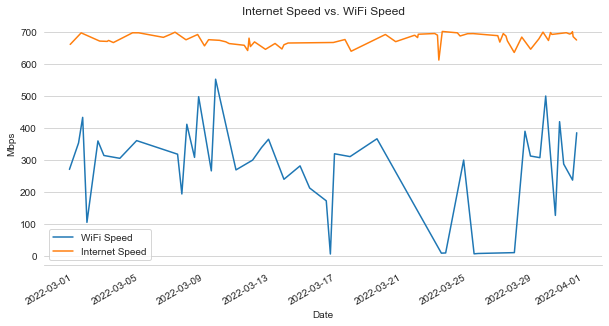

In [32]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
wifi_data_one_device.plot(
    ax=ax,
    y="Speed (Mbps)"
)
speed_data_one_device.plot(
    ax=ax,
    y="Speed"
)
ax.legend(["WiFi Speed", "Internet Speed"])
ax.set_title("Internet Speed vs. WiFi Speed")
ax.set_ylabel("Mbps")
ax.set_xlabel("Date")
ax.xaxis.grid(False)
sns.despine(left=True)